In [17]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [6]:
# import something
master_df = pd.read_csv('../datasets/MASTER_DF.csv')
master_df.head()

,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist,enzyme_class_1,enzyme_class_2,...,enzyme_class_7,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW
0,1.14.99.46,C20232,1.0,163311975,C/C(=C/NC(=O)N)/C(=O)OO,<rdkit.Chem.rdchem.Mol object at 0x1a7c6372b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.421512,1,0,...,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
1,3.5.1.110,C20232,1.0,163311975,C/C(=C/NC(=O)N)/C(=O)OO,<rdkit.Chem.rdchem.Mol object at 0x1a7c637300>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.467093,0,0,...,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
2,1.14.99.46,C00178,1.0,3478,CC1=CNC(=O)NC1=O,<rdkit.Chem.rdchem.Mol object at 0x1a7c637210>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.421512,1,0,...,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
3,1.17.99.4,C00178,1.0,3478,CC1=CNC(=O)NC1=O,<rdkit.Chem.rdchem.Mol object at 0x1a7c637620>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.414081,1,0,...,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
4,1.3.1.1,C00178,1.0,3478,CC1=CNC(=O)NC1=O,<rdkit.Chem.rdchem.Mol object at 0x1a7c637670>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.420926,1,0,...,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115


In [30]:
feature_df = master_df.iloc[:,7:24].copy()
feature_df.head()

,dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW
0,0.421512,1,0,0,0,0,0,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
1,0.467093,0,0,1,0,0,0,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
2,0.421512,1,0,0,0,0,0,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
3,0.414081,1,0,0,0,0,0,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
4,0.420926,1,0,0,0,0,0,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115


In [ ]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (-1 * results.mean(), results.std()))

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=simple_model,
        epochs=150, batch_size=25000, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print('MSE mean: %.4f ; std: %.4f' % (-1 * results.mean(), results.std()))

In [10]:
logreg=linear_model.LogisticRegression() 
features = np.array(feature_df) #shape balance array for regression
reactions = list(master_df['reacts'])


In [14]:
feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                    test_size=0.20)

In [15]:
# linear regression on default data

        
logreg.fit(feature_train, np.ravel(reaction_train)) #fit linear model, and shape default array for regression

#print('B0, B1: ',logreg.intercept_, logreg.coef_[0])

C:\Users\ellie\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
predictions = logreg.predict(feature_test)
print(predictions.summary)

AttributeError: 'numpy.ndarray' object has no attribute 'summary'

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(reaction_test, predictions)
print(confusion_matrix)
# upper left and lower right are correct: 1400 for the first go
# lower left and upper right are incorrect : 111 for the first go

[[1198    1]
 [ 110  217]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(reaction_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1199
         1.0       1.00      0.66      0.80       327

   micro avg       0.93      0.93      0.93      1526
   macro avg       0.96      0.83      0.88      1526
weighted avg       0.93      0.93      0.92      1526



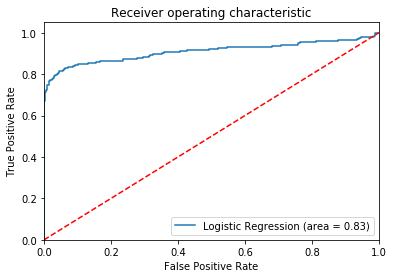

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(reaction_test, logreg.predict(feature_test))
fpr, tpr, thresholds = roc_curve(reaction_test, logreg.predict_proba(feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0, 0.5, 'Predicted value')

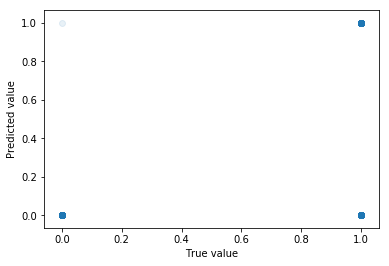

In [23]:
plt.scatter(reaction_test, predictions, alpha=0.1)
plt.xlabel('True value')
plt.ylabel('Predicted value')